In [2]:
%conda install pyg -c pyg -c conda-forge
%conda install pytorch torchvision torchaudio -c pytorch
%pip install networkx seaborn -Uq

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx

from tqdm import tqdm


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

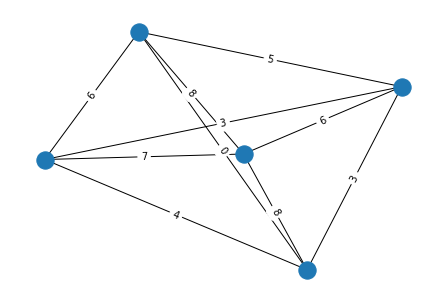

AttributeError: 'Graph' object has no attribute 'edge_index'

In [5]:
# pubmed = pd.read_csv('~/workspace/cogtext/data/pubmed_abstracts.')

# pubmed = pd.DataFrame(np.random.random((100,2)), columns=['label','pmid','vector'])
# pubmed.head()

pubmed_graph = nx.random_geometric_graph(5,5)

for (u, v) in pubmed_graph.edges():
    pubmed_graph.edges[u,v]['weight'] = np.random.randint(0,10)

pos = nx.spring_layout(pubmed_graph)
nx.draw(pubmed_graph, pos)
labels = nx.get_edge_attributes(pubmed_graph, 'weight')
nx.draw_networkx_edge_labels(pubmed_graph, pos,edge_labels=labels)
plt.show()
pubmed_graph

We create an edge between two nodes if their corresponding corpora share documents >= min_docs. The weight of the edge will be set to the pointwise mutual information between the two labels.

log(xy) - log(x) - log(y) + log(D)
xy is the number of articles shared between the two labels
x is the number of articles in the x corpus
and D is the total number of articles

In [4]:
import torch
from torch_geometric.nn import Node2Vec

data = 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=128, 
                 walk_length=20,                        # lenght of rw
                 context_size=10, walks_per_node=20,
                 num_negative_samples=1, 
                 p=200, q=1,                             # bias parameters
                 sparse=True).to(device)

loader = model.loader(batch_size=128, shuffle=True, num_workers=4)

for idx, (pos_rw, neg_rw) in enumerate(loader):
    print(idx, pos_rw.shape, neg_rw.shape)
    
edge_tuples = [tuple(x) for x in data.edge_index.numpy().transpose()]
G = nx.from_edgelist(edge_tuples)
pos = nx.spring_layout(G, center=[0.5, 0.5])
nx.set_node_attributes(G, pos, 'pos')